In [1]:
# 1

1. A simple linear regression is used to determine the response value and the corresponding confidence and prediction interval from the equation y = 103.4–2.12x. Determine which one of these two intervals correspond to the CI and which one to the PI and state your reasoning.  
A. fit=92,lower=74,upper=111  
B. fit=92,lower=85,upper=100 


A corresponds to the prediction interval (PI).    
B corresponds to the confidence interval (CI).    
At the same confidence level, the prediction interval is wider than the confidence interval.  

In [2]:
# 3

3. (4 points) A regression model has been created for number of enrolled students at a particular program (N) to relate it to marketing spending (S), month of enrollment (Time), and the number of faculty (F). The equation for this regression model is N = 1 + 1.2Time + 0.1S + 0.5F  

(a) (2 points) We would like to determine if N is significantly related to number of faculty or time taking into account the amount of spending. What are the null and alternative hypotheses that need to be tested?  
(b) (2 points) How do you interpret the coefficient b2 = 0.1 in the context of this problem?

In [3]:
# 3 (a)

b1----month of enrollment (Time)  
b3----the number of faculty (F)  
H0: b1 = b3 = 0  
Ha: At least one of b1 or b3 is nonzero.  


In [4]:
# 3 (b)

The partial slope b2=0.1 represents that the number of enrolled students at a particular program (N) increases by 0.1 people for every 1 point increase in the marketing spending (S), provided month of enrollment (Time), and the number of faculty (F) don't change.

In [5]:
# 4

4. (25 points) The file enrollment.csv contains the number of enrolled students at a partic- ular program (N), as well as the marketing spending (S) and month of enrollment (Time). Assume that N linearly increases with time and square root of spending. There’s also an element of seasonality that we would like to capture in our model by adding a sine and cosine term with the period of 12 months.

In [6]:
# (a) (4 points) Create a linear regression model based on the above description and report the coefficients.

In [7]:
df=read.csv('enrollment.csv')

In [8]:
head(df)

Time,S,N
1.000000,100.0000,2.793248
1.115578,104.5226,3.186870
1.231156,109.0452,4.498546
1.346734,113.5678,4.445209
1.462312,118.0905,4.101241
1.577889,122.6131,4.318172


In [9]:
library(ggplot2);

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


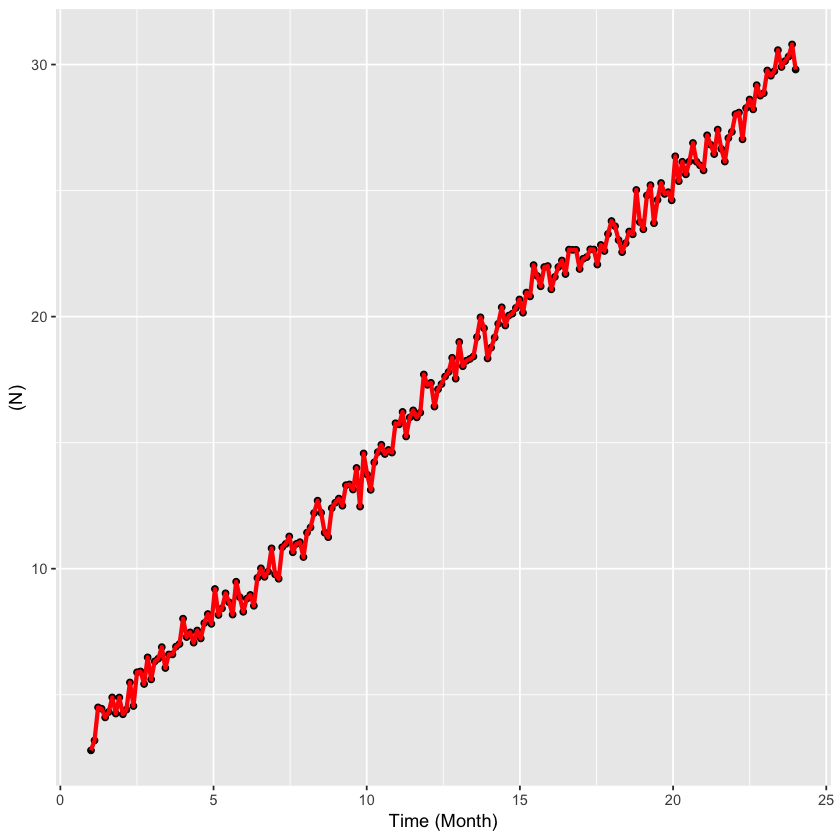

In [10]:
ggplot(aes(Time,N),data=df) +geom_point() +
labs(x='Time (Month)', y='(N)') +
geom_line(aes(Time,N),color='red',size=1.2)

In [11]:
formula= N ~ Time + sin(Time*pi/6) + cos(Time*pi/6) + sqrt(S)
fit= lm(formula, data=df)
summary(fit)


Call:
lm(formula = formula, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15213 -0.35908 -0.00316  0.36154  1.07881 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.28391    0.54008  -0.526      0.6    
Time              0.98708    0.04112  24.007  < 2e-16 ***
sin(Time * pi/6)  0.49958    0.05330   9.372  < 2e-16 ***
cos(Time * pi/6)  0.26646    0.05116   5.209 4.81e-07 ***
sqrt(S)           0.21730    0.04603   4.721 4.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4925 on 195 degrees of freedom
Multiple R-squared:  0.9961,	Adjusted R-squared:  0.996 
F-statistic: 1.243e+04 on 4 and 195 DF,  p-value: < 2.2e-16


In [12]:
round(summary(fit)$coef,5)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.28391,0.54008,-0.52568,0.59971
Time,0.98708,0.04112,24.00740,0.00000
sin(Time * pi/6),0.49958,0.05330,9.37243,0.00000
cos(Time * pi/6),0.26646,0.05116,5.20871,0.00000
sqrt(S),0.21730,0.04603,4.72128,0.00000


The result shows that (N) is -0.28391 when every predictor is zero.  
And (N) increases by 0.98708 people for every 1 month increases in Time, provided other predictors don't change.  
(N) increases by 0.49958 people for every 1 point increases in sin(Time * pi/6), provided other predictors don't change.  
(N) increases by 0.26646 people for every 1 point increases in cos(Time * pi/6), provided other predictors don't change.  
(N) increases by 0.21730 people for every 1 point increases in sqrt(S), provided other predictors don't change.  

The result shows that the coefficients passed the t-test and the model passed the F-test.  
The Adjusted R-squared value of 0.996 indicates the model explains over 99.6 percent of the variance in the data. This is a good explanation of fit.  
The p-value associated with each predictor is less than 0.001, it means each variable can explain the model well. 
The p-value associated with F-statistic is less than 0.001, so this model works.  

In [13]:
# (b) (1 points) What is the standard error of estimate?

In [14]:
# The standard error of estimate is

In [15]:
Se = summary(fit)$sigma
Se

[1] 0.49252

In [16]:
#(c) (4 points) Find the Cook’s distance and report the mean (Don’t report the individual values). Is there any influential points in the data set? If yes, specify the value. If no, state why.

In [17]:
library(stats)
cook = cooks.distance(fit)

In [18]:
# the mean of Cook’s distance
mean(cook)

[1] 0.005132983

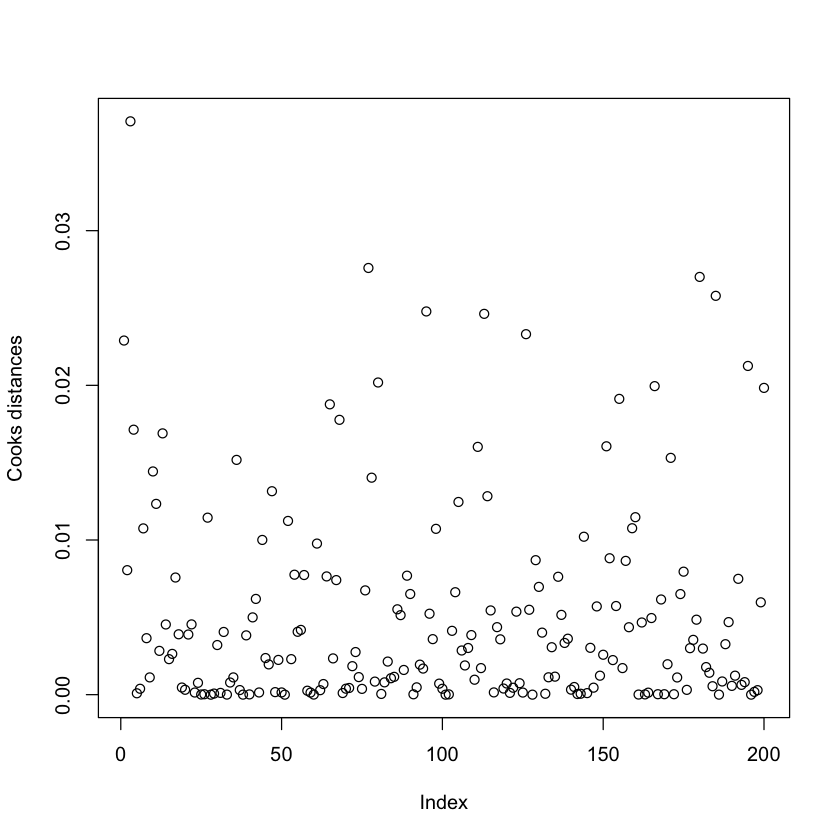

In [19]:
plot(cook, ylab='Cooks distances')

In [20]:
df[which(cook>1),]

Time,S,N


In [21]:
df[which(cook>0.5),]

Time,S,N


In [22]:
round(summary(cook),5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00042 0.00270 0.00513 0.00680 0.03707 

Typically, points with Cook's distance greater than 1 are classified as being influential. 
In this data set, the max Cook's distance is 0.03707. 
So there is no influential point in the data set.  

In [23]:
#(d) (4 points) Perform residual analysis (generate at least 2 plots) and indicate if the assumptions of linearity, normality and equal variance holds. Interpret your plots and explain your answer.

In [24]:
dresidual = resid(fit)

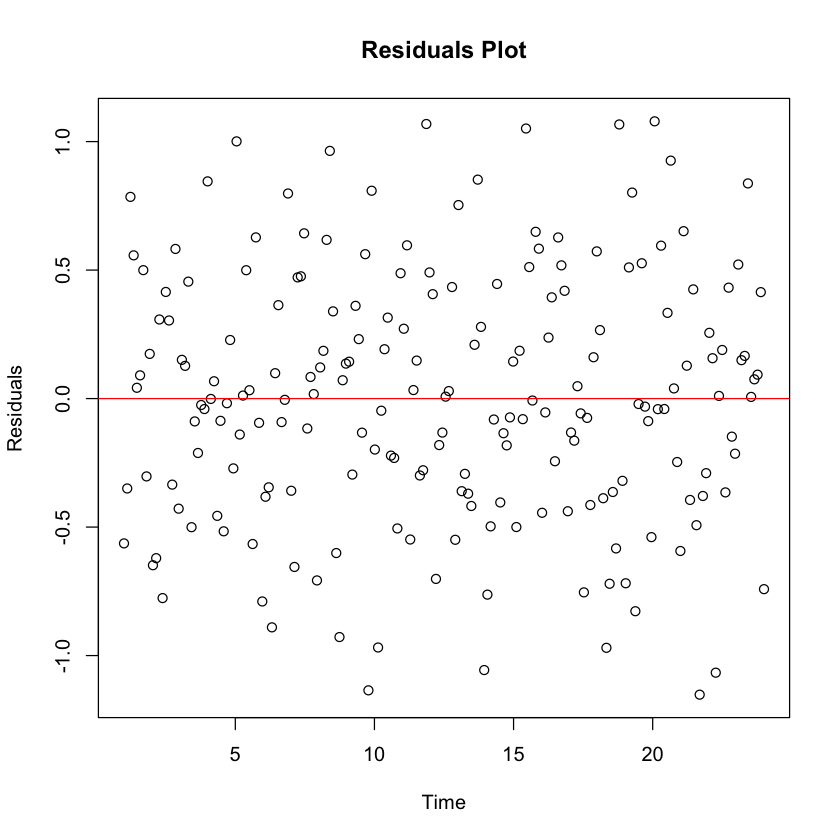

In [25]:
plot(df$Time, dresidual, ylab='Residuals', xlab='Time', main='Residuals Plot')
abline(0,0,col='red')

Linearity assumption:  
The plot shows that the residuals are randomly scattered about the zero line, so the linearity assumption is reasonable.  
  
Equal variance assumption:  
The plot shows that the residuals roughly fall roughly in a horizontal band about the zero line, it means the variation of the observed values of the response variable remain approximately constant from one value of the predictor variable to the next, so the equal variance assumption is reasonable.  
  
Normality assumption:  
The plot shows that the horizontal band is centered and symmetric about the zero line, it means for each value of the predictor variable, the distribution of the corresponding observed values of the response variable is approximately bell shaped, so the normality assumption is reasonable.  

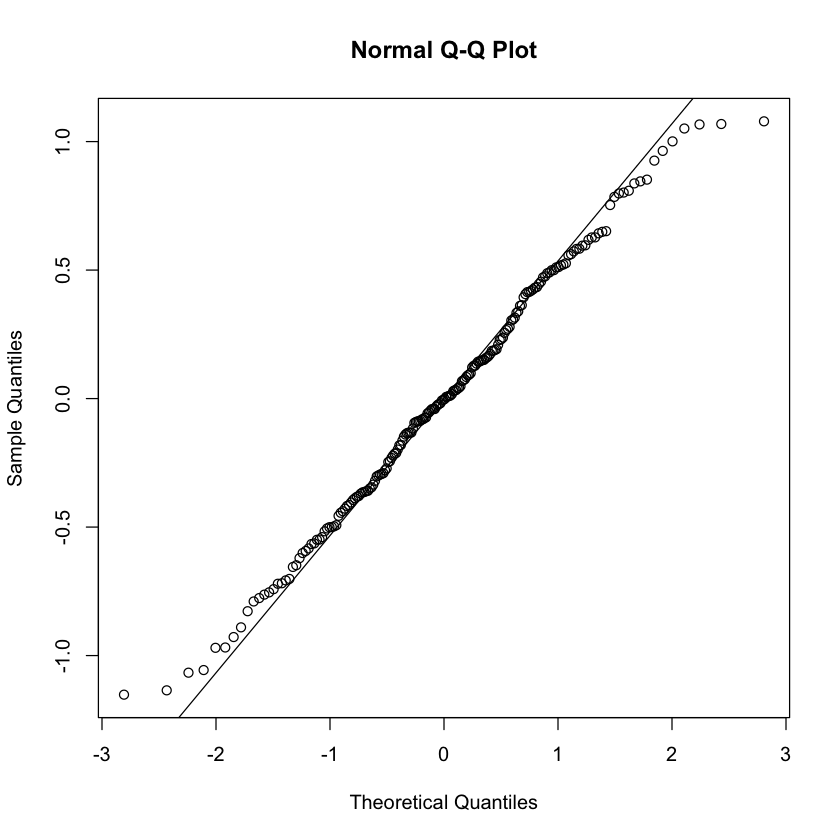

In [26]:
qqnorm(dresidual)
qqline(dresidual)

Check for Normality: Q-Q Plot  
The plot shows that the observed sample percentiles and theoretical percentiles of the normal distribution are approximately linear.  
So the data follows a normal distribution.  

In [27]:
# (e) (4 points) Predict the value of enrollment if the expenditures on marketing is 141 and time equals 10 and provide the relevant 95% confidence interval.

In [28]:
predict(fit,newdata=data.frame(Time=10, S=141), interval = "confidence", level = 0.95) 

fit,lwr,upr
11.86774,11.07138,12.66411


CI is (11.07138,12.66411)

In [29]:
#(f) (4 points) We would like to examine if the mean enrollment amount is different than 18 that the marketing department has claimed. Perform a t-test and indicate if you can reject the null hypothesis or not at the 5% significant level based on the current sample.

In [30]:
t.test(df$N, mu = 18, alternative = "two.sided", conf=0.95, var.eq=FALSE)


	One Sample t-test

data:  df$N
t = -1.8725, df = 199, p-value = 0.0626
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 15.87912 18.05485
sample estimates:
mean of x 
 16.96699 


P-value > 0.05  
So we don't reject the null hypothesis.  
At the 5% significance level, the data doesn't provide sufficient evidence to conclude that mean N is not equal to 18.

In [31]:
#(g) (4 points) At the 5% significance level, find the power of the test if the true mean of enrollment is 17.

In [32]:
true_mu=17
mu=18
delta=true_mu - mu
n=nrow(df)
s=sd(df$N)
alpha=0.05

power.t.test(n, delta, sd=s, sig.level=alpha, power=NULL, type='one.sample', alternative='two.sided')


     One-sample t test power calculation 

              n = 200
          delta = 1
             sd = 7.801746
      sig.level = 0.05
          power = 0.4380067
    alternative = two.sided


The power of the test is 0.4380067.